In [2]:
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [25]:
data = Dataset(r'MERRA2_401.tavgM_2d_rad_Nx.202109.nc4')

print(data.variables.keys())  # print the variable name

dict_keys(['lon', 'lat', 'time', 'ALBEDO', 'ALBNIRDF', 'ALBNIRDR', 'ALBVISDF', 'ALBVISDR', 'CLDHGH', 'CLDLOW', 'CLDMID', 'CLDTOT', 'EMIS', 'LWGAB', 'LWGABCLR', 'LWGABCLRCLN', 'LWGEM', 'LWGNT', 'LWGNTCLR', 'LWGNTCLRCLN', 'LWTUP', 'LWTUPCLR', 'LWTUPCLRCLN', 'SWGDN', 'SWGDNCLR', 'SWGNT', 'SWGNTCLN', 'SWGNTCLR', 'SWGNTCLRCLN', 'SWTDN', 'SWTNT', 'SWTNTCLN', 'SWTNTCLR', 'SWTNTCLRCLN', 'TAUHGH', 'TAULOW', 'TAUMID', 'TAUTOT', 'TS', 'Var_ALBEDO', 'Var_ALBNIRDF', 'Var_ALBNIRDR', 'Var_ALBVISDF', 'Var_ALBVISDR', 'Var_CLDHGH', 'Var_CLDLOW', 'Var_CLDMID', 'Var_CLDTOT', 'Var_EMIS', 'Var_LWGAB', 'Var_LWGABCLR', 'Var_LWGABCLRCLN', 'Var_LWGEM', 'Var_LWGNT', 'Var_LWGNTCLR', 'Var_LWGNTCLRCLN', 'Var_LWTUP', 'Var_LWTUPCLR', 'Var_LWTUPCLRCLN', 'Var_SWGDN', 'Var_SWGDNCLR', 'Var_SWGNT', 'Var_SWGNTCLN', 'Var_SWGNTCLR', 'Var_SWGNTCLRCLN', 'Var_SWTDN', 'Var_SWTNT', 'Var_SWTNTCLN', 'Var_SWTNTCLR', 'Var_SWTNTCLRCLN', 'Var_TAUHGH', 'Var_TAULOW', 'Var_TAUMID', 'Var_TAUTOT', 'Var_TS'])


In [26]:
for var in data.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    long_name: longitude
    units: degrees_east
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: 
current shape = (576,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    long_name: latitude
    units: degrees_north
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: 
current shape = (361,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: minutes since 2021-09-01 00:30:00
    time_increment: 60000
    begin_date: 20210901
    begin_time: 3000
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of -2147483647 used
<class 'net

In [27]:
temp=data.variables['ALBEDO'][:]
mean_temp=np.mean(temp,axis=0)
print(mean_temp)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [0.6589321494102478 0.6591400504112244 0.6593427658081055 ...
  0.6583187580108643 0.6585219502449036 0.6587259769439697]
 [0.6501826047897339 0.6503655314445496 0.6505440473556519 ...
  0.6496396064758301 0.6498163938522339 0.650001049041748]
 [0.6336456537246704 0.6336456537246704 0.6336456537246704 ...
  0.6336456537246704 0.6336456537246704 0.6336456537246704]]


In [32]:
lat=data.variables['lat'][:]
lon=data.variables['lon'][:]
print(lat)
print(lon)
print(lat[217],lat[218])
print(lon[405])

[-9.0000000e+01 -8.9500000e+01 -8.9000000e+01 -8.8500000e+01
 -8.8000000e+01 -8.7500000e+01 -8.7000000e+01 -8.6500000e+01
 -8.6000000e+01 -8.5500000e+01 -8.5000000e+01 -8.4500000e+01
 -8.4000000e+01 -8.3500000e+01 -8.3000000e+01 -8.2500000e+01
 -8.2000000e+01 -8.1500000e+01 -8.1000000e+01 -8.0500000e+01
 -8.0000000e+01 -7.9500000e+01 -7.9000000e+01 -7.8500000e+01
 -7.8000000e+01 -7.7500000e+01 -7.7000000e+01 -7.6500000e+01
 -7.6000000e+01 -7.5500000e+01 -7.5000000e+01 -7.4500000e+01
 -7.4000000e+01 -7.3500000e+01 -7.3000000e+01 -7.2500000e+01
 -7.2000000e+01 -7.1500000e+01 -7.1000000e+01 -7.0500000e+01
 -7.0000000e+01 -6.9500000e+01 -6.9000000e+01 -6.8500000e+01
 -6.8000000e+01 -6.7500000e+01 -6.7000000e+01 -6.6500000e+01
 -6.6000000e+01 -6.5500000e+01 -6.5000000e+01 -6.4500000e+01
 -6.4000000e+01 -6.3500000e+01 -6.3000000e+01 -6.2500000e+01
 -6.2000000e+01 -6.1500000e+01 -6.1000000e+01 -6.0500000e+01
 -6.0000000e+01 -5.9500000e+01 -5.9000000e+01 -5.8500000e+01
 -5.8000000e+01 -5.75000

Text(0, 0.5, 'Latitude')

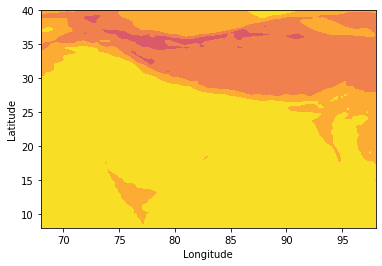

In [7]:
plt.contourf(lon, lat, mean_temp,cmap='plasma')
plt.xlim(68,98)
plt.ylim(8,40)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [8]:
map_dataset = Dataset('air_temperature_at_2_metres.netcdf', maskandscale = True, mmap = False)
lats = map_dataset.variables['lat'][:]
lons = map_dataset.variables['lon'][:]


def plot_map_time(n):
    temps  = map_dataset.variables['air_temperature_at_2_metres'][n, :, :]
    ax   = plt.axes(projection=ccrs.PlateCarree())
    plt.contourf(lons, lats, temps, cmap = 'viridis', transform=ccrs.PlateCarree())
    ax.set_extent([60, 120, 0, 40])   # regional map (x0, x1, y0, y1)  
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.gridlines(draw_labels=True)
    plt.savefig('fig'+str(n),bbox_inches='tight',dpi=400)
    plt.show()

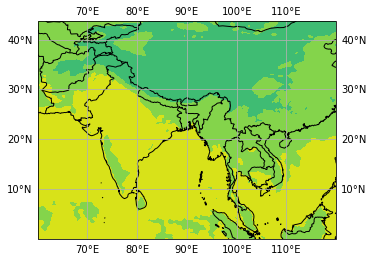

In [9]:
plot_map_time(1)

C:\Users\vergi\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\vergi\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\vergi\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\vergi\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


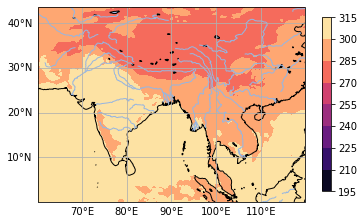

In [44]:
import cartopy.feature

ax   = plt.axes(projection=ccrs.PlateCarree())

plot = plt.contourf(lons, lats, temps, cmap = 'magma', transform=ccrs.PlateCarree())
plt.colorbar(plot, ax=ax, shrink=0.8)

ax.set_extent([60, 120, 0, 40])   # regional map (x0, x1, y0, y1)  
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.top_labels   = False
gl.right_labels = False


ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
plt.show()